In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import ourstuff as stf


# Project 2.. trying again..
# dataset: https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones#
# The data was automatically split... 70% of the data was selected as training, and 30% selected as test
#



# Load data
X_train = np.array(pd.read_csv("X_train.csv", header=None).values)
y_train = np.array(pd.read_csv("subject_train.csv",header =None).values)
y_train_labels = np.array(pd.read_csv("y_train.csv",header=None).values)

X_test = (pd.read_csv("X_test.csv", header =None).values)
y_test = (pd.read_csv("subject_test.csv", header =None).values)
y_test_labels = (pd.read_csv("y_test.csv",header=None).values)

#types of classifiers
knn = KNeighborsClassifier() # knn fit
clf = MLPClassifier() # nn fit

print("X_train:", X_train.shape, "y_train", y_train.shape, "y_train_labels", y_train_labels.shape)

X_train: (7352, 561) y_train (7352, 1) y_train_labels (7352, 1)


projectedX_train.shape  (7352, 1)


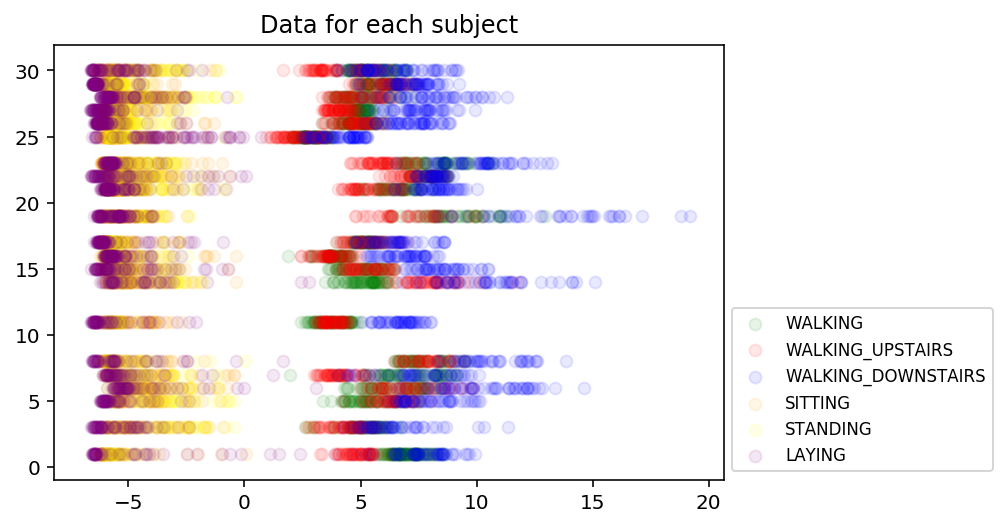

In [2]:
# Reduce dimensionality of X_train to plot next to y_train
pca = PCA(n_components=1)
projectedX_train = projectedX_train = pca.fit_transform(X_train.data)
print("projectedX_train.shape ",projectedX_train.shape)


#plot the projected data
fontP = FontProperties()
fontP.set_size('small')

plt.title("Data for each subject")
plt.scatter(projectedX_train[y_train_labels==1],y_train[y_train_labels==1], alpha=0.09,label = "WALKING", c='g')
plt.scatter(projectedX_train[y_train_labels==2],y_train[y_train_labels==2], alpha=0.09,label = "WALKING_UPSTAIRS",c = 'r')
plt.scatter(projectedX_train[y_train_labels==3],y_train[y_train_labels==3], alpha=0.09,label = "WALKING_DOWNSTAIRS", c = 'b')
plt.scatter(projectedX_train[y_train_labels==4],y_train[y_train_labels==4], alpha=0.09,label = "SITTING", c="orange")
plt.scatter(projectedX_train[y_train_labels==5],y_train[y_train_labels==5], alpha=0.09,label ="STANDING", c="yellow")
plt.scatter(projectedX_train[y_train_labels==6],y_train[y_train_labels==6], alpha=0.09,label = "LAYING", c="purple")

plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Score on train = 0.16974972796517954


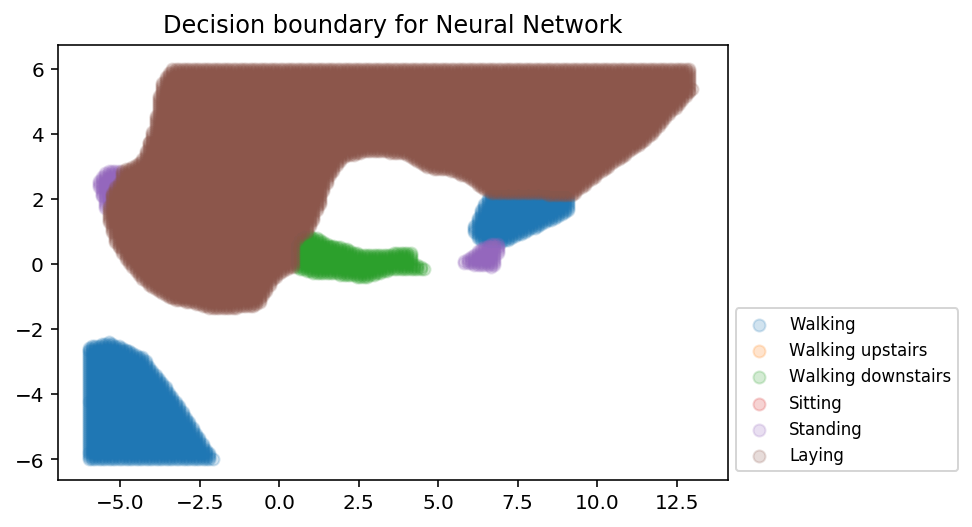

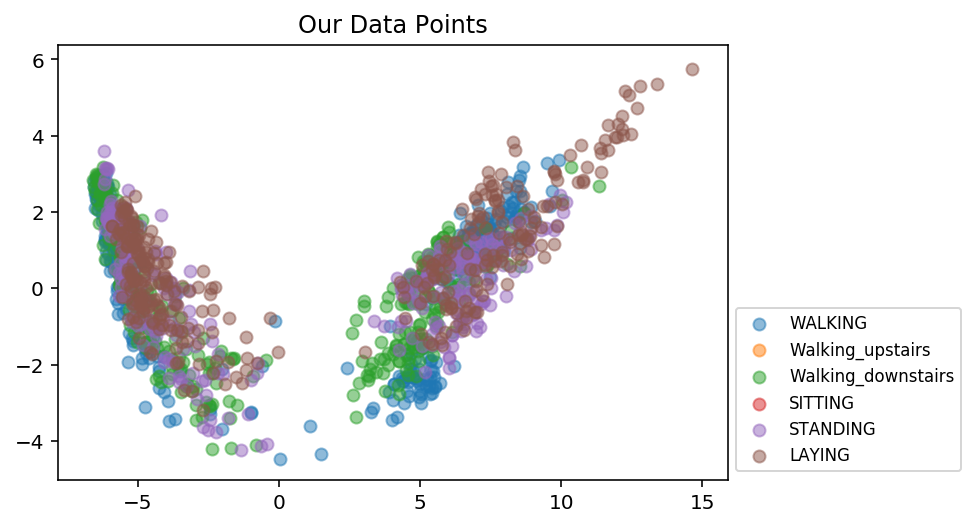

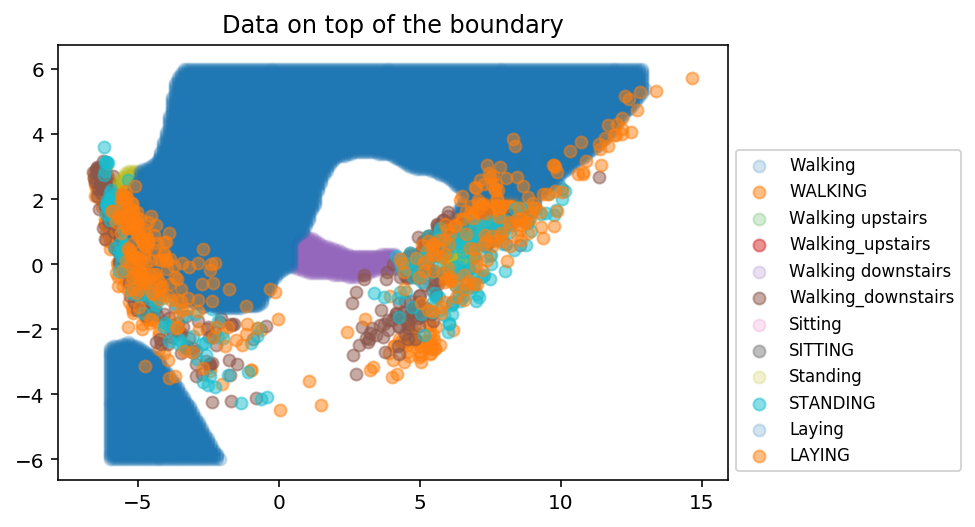

In [3]:
#NN Train
#basically np.meshgrid
num = 200
yc = np.linspace(-6,15,num)
xc = np.linspace(-6,6,num)
cart_prod = np.transpose([np.tile(xc, len(yc)), np.repeat(yc, len(xc))])
Xc = np.c_[cart_prod[:,1],cart_prod[:,0]]

#conversion of dimensions and fitting
X_pca_train = PCA(n_components=2).fit_transform(X_train)
nfit = clf.fit(X_pca_train,y_train)
g = clf.predict(Xc)

says_yeah = g == 1
says_no = ~says_yeah
y = y_train.ravel()


print("Score on train =",clf.score(X_pca_train,y_train))


#labels for legend and plotting
labels = ["Walking","Walking upstairs","Walking downstairs","Sitting","Standing","Laying"]
labelss = ["WALKING","Walking_upstairs","Walking_downstairs","SITTING","STANDING","LAYING"]


# plot the decision boundary
plt.title("Decision boundary for Neural Network")
fontP = FontProperties()
fontP.set_size('small')
for val in range(1,7):
    plt.scatter(Xc[g==val][:,0],Xc[g==val][:,1],alpha=0.2,label=labels[val-1])
    #plt.scatter(X_pca_train[:,0][y==val],X_pca_train[:,1][y==val],alpha=.5,label=val)

plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
plt.show()

#plot the points
plt.title("Our Data Points")
for val in range(1,7):
    plt.scatter(X_pca_train[:,0][y==val],X_pca_train[:,1][y==val],alpha=.5,label=labelss[val-1])
    
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
plt.show()

#plot the decision boundary on the points
plt.title("Data on top of the boundary")
for val in range(1,7):
    plt.scatter(Xc[g==val][:,0],Xc[g==val][:,1],alpha=0.2,label=labels[val-1])
    plt.scatter(X_pca_train[:,0][y==val],X_pca_train[:,1][y==val],alpha=.5,label=labelss[val-1])
    
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
plt.show()

In [4]:
X_pca_train.shape, y.shape, y_train.shape, 

clf.fit(X_train,y_train)
clf.predict(X_train)
clf.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.0

In [5]:
clf.fit(X_test,y_test)
clf.predict(X_test)
clf.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9738717339667459

In [6]:
X_pca_test.shape

NameError: name 'X_pca_test' is not defined

In [0]:
#KNN on test
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    num = 150
    yc = np.linspace(-6,15,num)
    xc = np.linspace(-6,6,num)
    cart_prod = np.transpose([np.tile(xc, len(yc)), np.repeat(yc, len(xc))])
    Xc = np.c_[cart_prod[:,1],cart_prod[:,0]]


    X_pca_test = PCA(n_components=2).fit_transform(X_test)
    kfit = knn.fit(X_pca_test,y_test)
    g = knn.predict(Xc)


    says_yeah = g == 1
    says_no = ~says_yeah
    y = y_test.ravel()
    #kpredict = knn.predict(X_train)

    print("Score on test =",knn.score(X_pca_test,y) )

    plt.title("Decision boundary for KNN= {}".format(i))
    fontP = FontProperties()
    fontP.set_size('small')
    

    #plt.scatter(Xc[says_no][:,0],Xc[says_no][:,1],alpha=0.05,color='r')

    labels = ["Walking","Walking upstairs","Walking downstairs","Sitting","Standing","Laying"]
    labelss = ["WALKING","Walking_upstairs","Walking_downstairs","SITTING","STANDING","LAYING"]
    
    
    for val in range(1,7):
        plt.scatter(X_pca_test[g==val][:,0],X_pca_test[g==val][:,1],alpha=0.2,label=labels[val-1])
        #plt.scatter(X_pca_test[:,0][y==val],X_pca_test[:,1][y==val],alpha=.5,label=labelss[val-1])
  
    plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
    plt.show()
    
    
    for val in range(1,7):
        plt.scatter(X_pca_test[:,0][y==val],X_pca_test[:,1][y==val],alpha=.5,label=labelss[val-1])
    plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
    plt.show()




In [0]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.predict(X_train)
knn.score(X_train,y_train)

In [0]:
#KNN up to 10 neighbors
num = 100
yc = np.linspace(-6,15,num)
xc = np.linspace(-6,6,num)
cart_prod = np.transpose([np.tile(xc, len(yc)), np.repeat(yc, len(xc))])
Xc = np.c_[cart_prod[:,1],cart_prod[:,0]]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    X_pca_train = PCA(n_components=2).fit_transform(X_train)
    kfit = knn.fit(X_pca_train,y_train)
    g = knn.predict(Xc)

    says_yeah = g == 1
    says_no = ~says_yeah
    y = y_train.ravel()
    
    # print the scores for train 
    print("Score on train =",knn.score(X_pca_train,y) )

    plt.title("Decision boundary for KNN= {}".format(i))
    #plt.scatter(Xc[says_no][:,0],Xc[says_no][:,1],alpha=0.05,color='r')
    colors = ['b','g','r','c','m','y','orange','purple','brown']
    labels = ["Walking","Walking upstairs","Walking downstairs","Sitting","Standing","Laying"]
    fontP = FontProperties()
    fontP.set_size('small')
    
    for val in range(1,7):
        plt.scatter(Xc[g==val][:,0],Xc[g==val][:,1],alpha=0.2,label=labels[val-1])
        #plt.scatter(X_pca_train[:,0][y==val],X_pca_train[:,1][y==val],alpha=.5,label=val)
        #plt.scatter(projectedX_train[:,0][y==val],X_pca_train[:,0][y==val], alpha=0.09)
    #plt.scatter(X_pca_train[y !=1][:,0],X_pca_train[y !=1][:,1],label="-1",alpha=0.43,c='white')
    plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
    plt.show()
    for val in range(1,7):
        plt.scatter(X_pca_train[:,0][y==val],X_pca_train[:,1][y==val],alpha=.5,label=val)
    plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1,prop=fontP)
    plt.show()